# EDA-Project 



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ht=pd.read_csv("./houses_to_rent.csv")
ht.drop("Unnamed: 0",axis=1,inplace=True)
ht.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [4]:
ht['total'] = ht['total'].str.replace(',', '')
ht['total'] = ht['total'].str.replace('$', '')
ht['total'] = ht['total'].str.replace('R', '')

In [6]:
ht['hoa'] = ht['hoa'].str.replace(',', '')
ht['hoa'] = ht['hoa'].str.replace('$', '')
ht['hoa'] = ht['hoa'].str.replace('R', '')

In [12]:
ht['rent amount'] = ht['rent amount'].str.replace(',', '')
ht['rent amount'] = ht['rent amount'].str.replace('$', '')
ht['rent amount'] = ht['rent amount'].str.replace('R', '')
ht['property tax'] = ht['property tax'].str.replace(',', '')
ht['property tax'] = ht['property tax'].str.replace('$', '')
ht['property tax'] = ht['property tax'].str.replace('R', '')
ht['fire insurance'] = ht['fire insurance'].str.replace(',', '')
ht['fire insurance'] = ht['fire insurance'].str.replace('$', '')
ht['fire insurance'] = ht['fire insurance'].str.replace('R', '')

In [14]:
ht #процесс обработки-очистки данных

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,acept,not furnished,420,1150,0,15,1585
6076,1,84,2,2,1,16,not acept,furnished,768,2900,63,37,3768
6077,0,48,1,1,0,13,acept,not furnished,250,950,42,13,1255
6078,1,160,3,2,2,-,not acept,not furnished,0,3500,250,53,3803


In [15]:
ht['rent amount']=ht['rent amount'].astype(float)

In [16]:
ht['rent amount'].mean()

4395.844407894737

In [17]:
ht['rent amount'].median()

3111.0

In [18]:
ht['rent amount'].std()

3576.6689462284153

In [19]:
ht['rent amount'].describe()

count     6080.000000
mean      4395.844408
std       3576.668946
min        420.000000
25%       1800.000000
50%       3111.000000
75%       5952.500000
max      45000.000000
Name: rent amount, dtype: float64

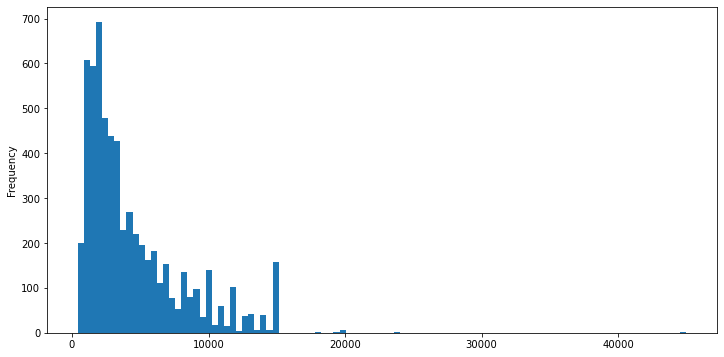

In [20]:
plt.figure(figsize=(12,6))
ht['rent amount'].plot(kind='hist',bins=100);

                 Вопросы
1.В каком городе самая высокая средняя арендная плата?
2.Сколько ванных комнат в домах с более высокой арендной платой?
3.Самая дорогая недвижимость принимает животных?
4.Меблирована ли самая дорогая недвижимость?

In [21]:
#1.В каком городе самая высокая средняя арендная плата?
ht.groupby('city')['rent amount'].mean().reset_index().sort_values('rent amount',ascending=False)
#Таким образом, первый город(1) с самой высокой арендной платой за используемую базу.

,city,rent amount
1,1,4695.003429
0,0,2506.210590


In [22]:
#2.Сколько ванных комнат в домах с более высокой арендной платой?
#Создание новой колонны для классификации высоких и низких значений
ht['value_level'] = ['high' if x > 5000 else 'low' for x in ht['rent amount']]

In [23]:
ht.groupby('value_level')['bathroom'].mean()

value_level
high    3.647256
low     1.798556
Name: bathroom, dtype: float64

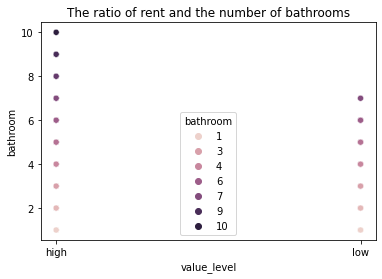

In [24]:
g=sns.set_context=('talk')
g=sns.scatterplot(x='value_level',y='bathroom',hue='bathroom',
           data=ht).set(title="The ratio of rent and the number of bathrooms")

In [25]:
# Анализ количества ванных комнат в арендной плате считается высоким.
ht.groupby(['value_level','city'])['bathroom'].mean()['high']
#В домах с более высокой арендной платой в среднем 3,6 ванных комнаты по сравнению с 1,7 для более низкой арендной платы. 
#Среди самых высоких арендных плат город(0) имеет высокий показатель, а город 1 меньший.

city
0    4.530000
1    3.594899
Name: bathroom, dtype: float64

In [26]:
#3.Самая дорогая недвижимость принимает животных?
## Фильтрация набора данных и расчет процента
ht.query('value_level == "high" & animal == "acept"').shape[0] /ht.query('value_level == "high"').shape[0]

0.8185890257558791

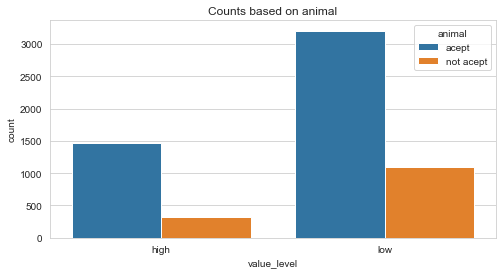

In [27]:
def animal_value_level(data=None,param=[],fontsize=15):
    plt.figure(figsize=(8,4))
    sns.set_style('whitegrid')
    for i,g in enumerate(param):
        sns.countplot(x='value_level',hue=g,data=data).set_title('Counts based on {}'.format(g))

animal_value_level(data=ht,param=['animal'])

Таким образом, в городах с более низкой арендной платой: больший процент принятия на разрешение содержания животных.

In [28]:
ht.query('value_level == "high" & animal == "acept"').groupby('city').count()['animal'] #подсчитываем количество разрешений для содержания животного в квартире

city
0      89
1    1373
Name: animal, dtype: int64

In [29]:
#процент принятия по городам(0 и 1).
ht.query('value_level == "high" & animal == "acept"').groupby('city').count()['animal'] / ht.query('value_level == "high"').groupby('city').count()['animal']

city
0    0.890000
1    0.814353
Name: animal, dtype: float64

In [30]:
#Таким образом, согласно анализу среди объектов недвижимости с наибольшей стоимостью, 81% принимают животных.
#город(0) (89,0%) является регионом с наибольшим процентом приема, а город (1) (81,4%) - низким.

In [31]:
#4.Меблирована ли самая дорогая недвижимость?
# Расчет %
ht.query('value_level == "high" & furniture == "furnished"').shape[0] /ht.query('value_level == "high"').shape[0]

0.35442329227323627

In [32]:
# Расчет процента по городам(регионам)
ht.query('value_level == "high" & furniture == "furnished"').groupby('city').count()['furniture'] / ht.query('value_level == "high"').groupby('city').count()['furniture']

city
0    0.180000
1    0.364769
Name: furniture, dtype: float64

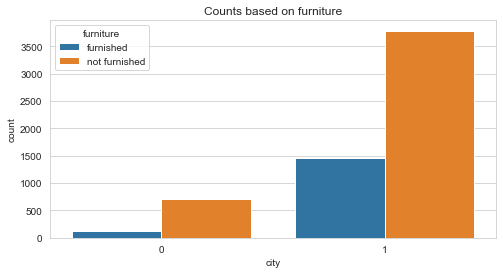

In [33]:
def furnished_value_level(data=None,param=[],fontsize=15):
    plt.figure(figsize=(8,4))
    sns.set_style('whitegrid')
    for i,g in enumerate(param):
        sns.countplot(x='city',hue=g,data=data).set_title('Counts based on {}'.format(g))

furnished_value_level(data=ht,param=['furniture'])

In [34]:
#В целом только 35% недвижимости стоимостью более 5000,0 меблированы, при этом регион (0) имеет самый низкий показатель (18,0%), а регион-город (1)самый высокий (36,4%).

In [35]:
#Оценка корреляции между переменными

In [36]:
#перевод некоторых значений в тип float
ht['fire insurance'] = pd.to_numeric(ht['fire insurance'], errors='coerce')
ht['fire insurance']=ht['fire insurance'].astype(float)

<AxesSubplot:>

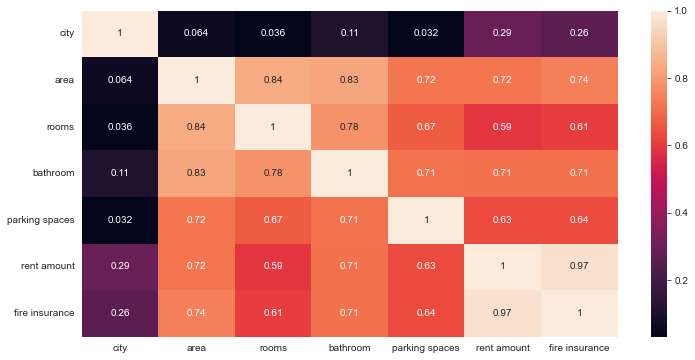

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(ht.corr(method='spearman'), annot=True)

In [38]:
#На карте корреляции мы видим, что все переменные положительно коррелируют со стоимостью арендной платы.
#При этом "пожарное страхование" имеет очень сильную корреляцию, а стоимость Товарищества собственников жилья (ТСЖ) - слабую корреляцию.